In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

os.getcwd()

'C:\\Users\\Asus\\Desktop\\odev_last'

In [2]:
excel_file_path = "./results/result_history.xlsx"

columns = ["version","epochs","conv1","conv2","conv3","dropout1","dropout2","dense1","dense2","test_acc","f1_score","relevance","precision","recall"]

In [3]:
df = pd.read_excel(excel_file_path, header=None,names=columns) 
df

,version,epochs,conv1,conv2,conv3,dropout1,dropout2,dense1,dense2,test_acc,f1_score,relevance,precision,recall
0,0,100,52,50,49,10,11,30,32,0.657791,0.663843,1.362688,3.084548,0.671610
1,1,100,69,70,67,32,32,58,36,0.580938,0.664145,0.488420,1.080267,0.778273
2,2,100,85,88,84,52,51,81,38,0.618154,0.698941,0.438426,0.902618,0.785769
3,3,100,100,104,96,67,63,97,40,0.652042,0.665356,0.445450,0.983373,0.694713
4,4,100,112,110,101,81,72,107,42,0.664448,0.665961,0.483569,1.089343,0.668086
5,5,100,122,110,106,82,75,116,41,0.664750,0.664750,0.504005,1.136762,0.666970
6,6,100,126,106,99,81,74,115,40,0.663843,0.663843,35.192798,79.858925,0.663843
7,7,100,127,95,85,75,65,102,39,0.657186,0.671710,0.478199,1.025807,0.709340
8,8,100,120,76,71,58,50,79,37,0.594554,0.702874,0.403804,0.823993,0.824245
9,9,100,103,54,52,37,33,48,34,0.643570,0.672012,0.463684,0.985377,0.731179


In [4]:
total_params = df["conv1"]+df["conv2"]+df["conv3"]+df["dropout1"]+df["dropout2"]+df["dense1"]+df["dense2"]

In [5]:
total_params

0    234
1    364
2    479
3    567
4    625
5    652
6    641
7    588
8    491
9    361
dtype: int64

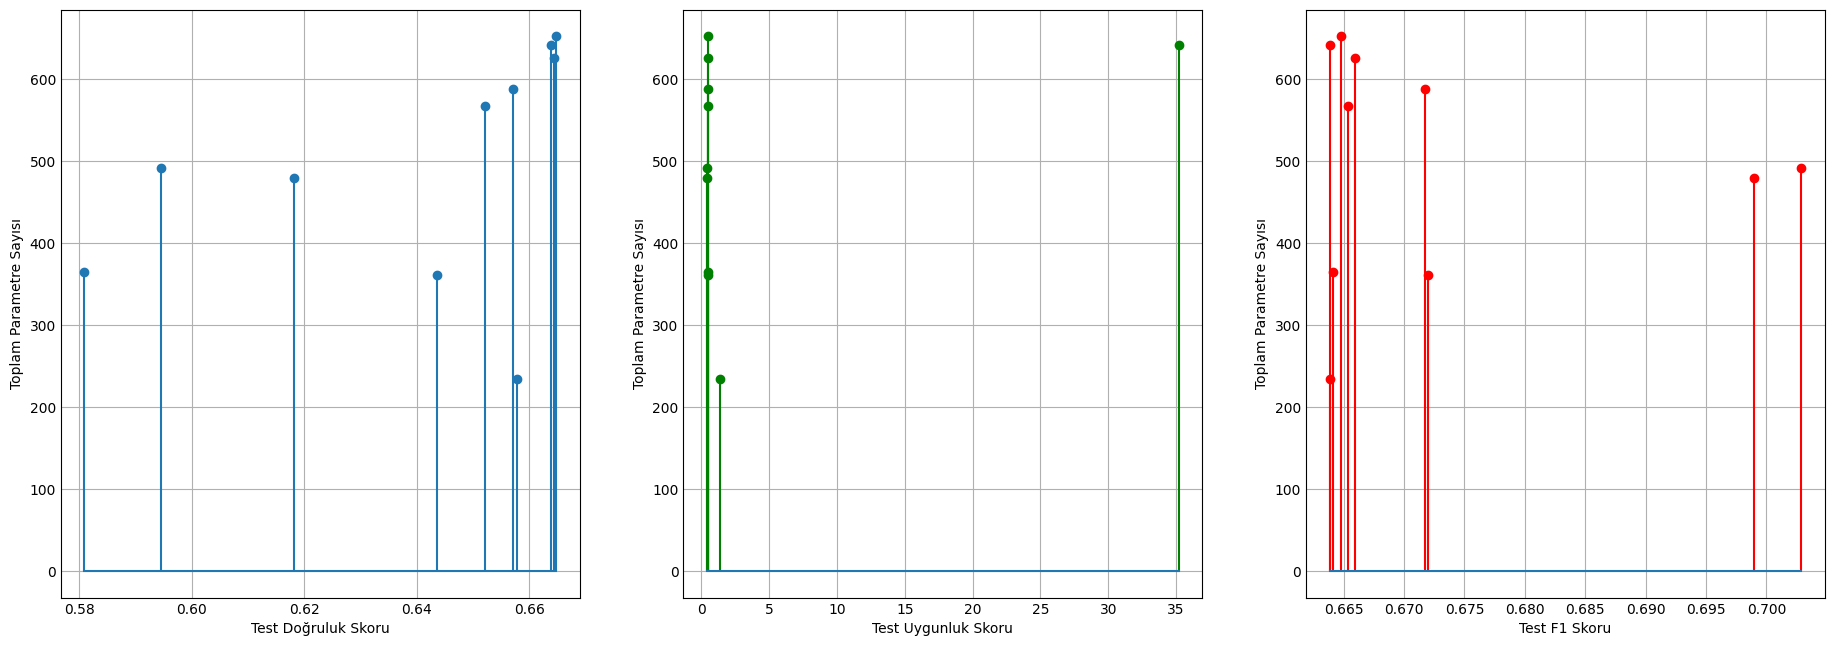

In [6]:
## TRAİN ACCURACY
plt.style.use('_mpl-gallery')

fig, ax1 = plt.subplots(1, 3, figsize=(18, 6))

ax1[0].stem(df["test_acc"], total_params)
ax1[0].set_xlabel("Test Doğruluk Skoru")
ax1[0].set_ylabel("Toplam Parametre Sayısı")

# Plot for Relevance(test accuracy*precision*recall)
ax1[1].stem(df["relevance"], total_params, linefmt='g-')
ax1[1].set_xlabel("Test Uygunluk Skoru")
ax1[1].set_ylabel("Toplam Parametre Sayısı")

# Plot for F1 Score
ax1[2].stem(df["f1_score"], total_params, linefmt='r-')
ax1[2].set_xlabel("Test F1 Skoru")
ax1[2].set_ylabel("Toplam Parametre Sayısı")

plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


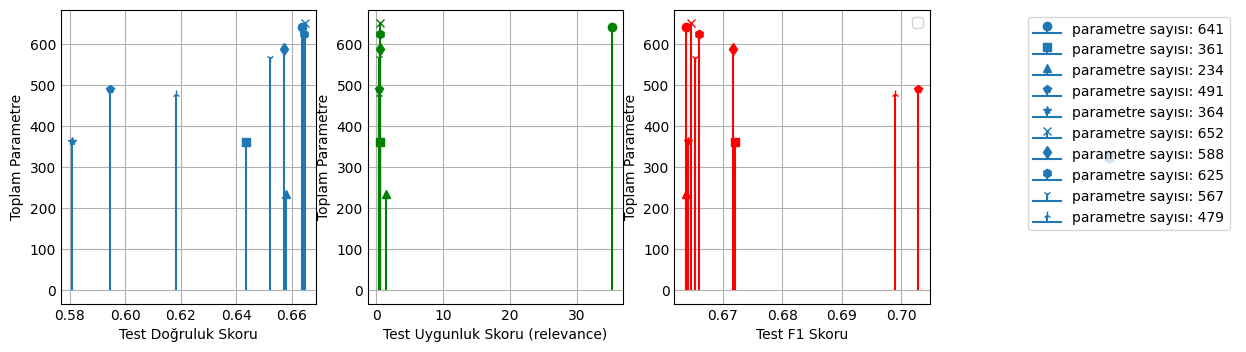

In [11]:
import matplotlib.pyplot as plt

# Assuming you have imported your data (train_acc, test_acc, f1_score, total_params)

# Create a unique marker style for each total_params value
markers = ['o','s','^','p','*','x','d','h','1','2','3','4','']

# Plot for Train Accuracy
plt.style.use('_mpl-gallery')
fig, axs = plt.subplots(1, 4, figsize=(12, 3))

unique_total_params = list(set(total_params))  # Get unique total_params values


# Test Doğruluk Plotu
for i, total_param_value in enumerate(unique_total_params):
    mask = total_params == total_param_value
    axs[0].stem(df["test_acc"][mask], total_params[mask], markerfmt=markers[i])
axs[0].set_xlabel("Test Doğruluk Skoru")
axs[0].set_ylabel("Toplam Parametre")

# Test Uygunluk Plotu
for i, total_param_value in enumerate(unique_total_params):
    mask = total_params == total_param_value
    axs[1].stem(df["relevance"][mask], total_params[mask], markerfmt=markers[i], linefmt='g')
axs[1].set_xlabel("Test Uygunluk Skoru (relevance)")
axs[1].set_ylabel("Toplam Parametre")

# Test F1 Skoru Plotu
for i, total_param_value in enumerate(unique_total_params):
    mask = total_params == total_param_value
    axs[2].stem(df["f1_score"][mask], total_params[mask], markerfmt=markers[i], linefmt='r')
axs[2].set_xlabel("Test F1 Skoru")
axs[2].set_ylabel("Toplam Parametre")
axs[2].legend()

# Değerler ve semboller Plot
for i, total_param_value in enumerate(unique_total_params):
    mask = total_params == total_param_value
    axs[3].stem(0, 0, markerfmt=markers[i],label=f'parametre sayısı: {total_param_value}')
axs[3].legend()

##çizgileri kaldır
axs[3].spines['right'].set_visible(False)
axs[3].spines['top'].set_visible(False)
axs[3].spines['left'].set_visible(False)
axs[3].spines['bottom'].set_visible(False)

#grid çizgileri kaldır
axs[3].xaxis.grid(False)
axs[3].yaxis.grid(False)

#eksen değerleri kaldır
axs[3].set_xticks([])
axs[3].set_yticks([])

plt.savefig("plot_2d_scores.jpg")


plt.show()

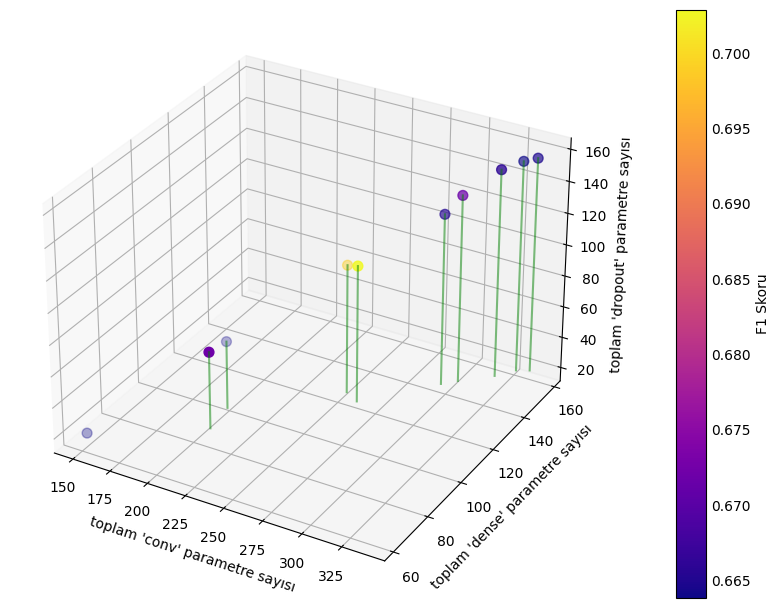

In [8]:
x = df["conv1"]+df["conv2"]+df["conv3"]
y = df["dense1"]+df["dense2"]
z = df["dropout1"]+df["dropout2"]
z2=np.ones(shape=x.shape)*min(z)  ##çizgiler için

renk_ozellik = df["f1_score"]

# Renk haritası (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
renk_haritasi = 'plasma'
    
# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=renk_ozellik, cmap=renk_haritasi, s=50)

#çizgiler
for i,j,k,h in zip(x,y,z,z2):
    ax.plot([i,i],[j,j],[k,h], color='green', alpha= 0.5)

# Renk çubuğunu ekle
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('F1 Skoru')


    
# Eksen etiketlerini ekle
ax.set_xlabel("toplam 'conv' parametre sayısı")
ax.set_ylabel("toplam 'dense' parametre sayısı ")
ax.set_zlabel("toplam 'dropout' parametre sayısı")

plt.savefig("plot_3d_f1_score.jpg")

plt.show()

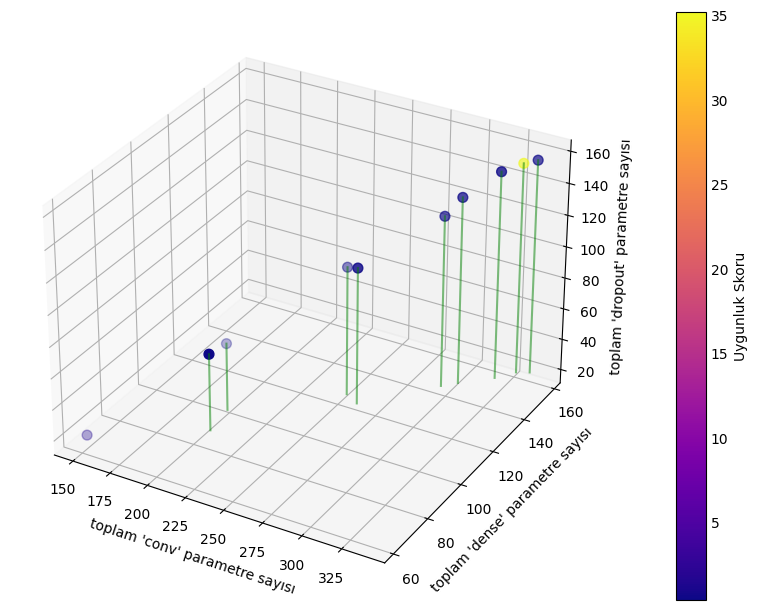

In [9]:
x = df["conv1"]+df["conv2"]+df["conv3"]
y = df["dense1"]+df["dense2"]
z = df["dropout1"]+df["dropout2"]
z2=np.ones(shape=x.shape)*min(z)  ##çizgiler için

renk_ozellik = df["relevance"]

# Renk haritası (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
renk_haritasi = 'plasma'
    
# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=renk_ozellik, cmap=renk_haritasi, s=50)

#çizgiler
for i,j,k,h in zip(x,y,z,z2):
    ax.plot([i,i],[j,j],[k,h], color='green', alpha= 0.5)

# Renk çubuğunu ekle
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Uygunluk Skoru')


    
# Eksen etiketlerini ekle
ax.set_xlabel("toplam 'conv' parametre sayısı")
ax.set_ylabel("toplam 'dense' parametre sayısı ")
ax.set_zlabel("toplam 'dropout' parametre sayısı")

plt.savefig("plot_3d_relevance_score.jpg")

plt.show()

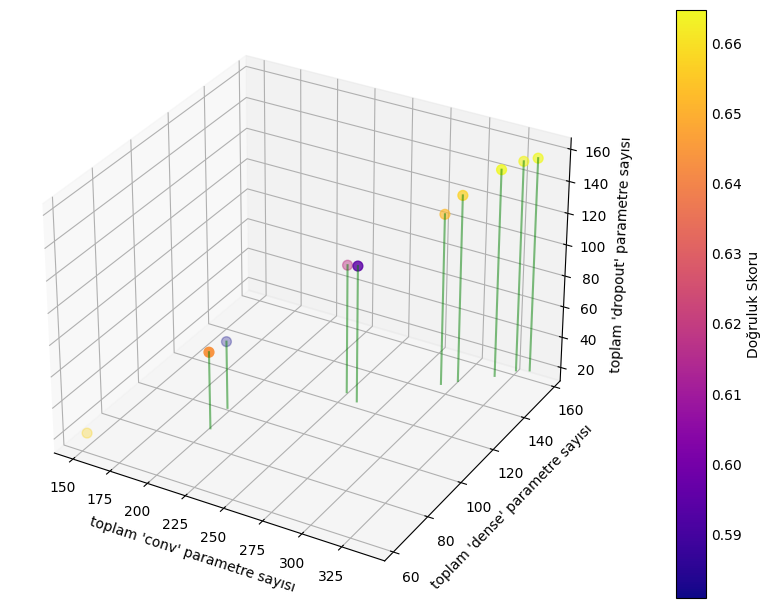

In [10]:
x = df["conv1"]+df["conv2"]+df["conv3"]
y = df["dense1"]+df["dense2"]
z = df["dropout1"]+df["dropout2"]
z2=np.ones(shape=x.shape)*min(z)  ##çizgiler için

renk_ozellik = df["test_acc"]

# Renk haritası (https://matplotlib.org/stable/tutorials/colors/colormaps.html)
renk_haritasi = 'plasma'
    
# 3D scatter plot
fig = plt.figure(figsize=(8,6))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(x, y, z, c=renk_ozellik, cmap=renk_haritasi, s=50)

#çizgiler
for i,j,k,h in zip(x,y,z,z2):
    ax.plot([i,i],[j,j],[k,h], color='green', alpha= 0.5)

# Renk çubuğunu ekle
cbar = plt.colorbar(scatter, ax=ax, pad=0.1)
cbar.set_label('Doğruluk Skoru')


    
# Eksen etiketlerini ekle
ax.set_xlabel("toplam 'conv' parametre sayısı")
ax.set_ylabel("toplam 'dense' parametre sayısı ")
ax.set_zlabel("toplam 'dropout' parametre sayısı")

plt.savefig("plot_3d_acc_score.jpg")

plt.show()